<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/CIFAR_10_Object_Detection_using_Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing the Kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# dataset api
!kaggle competitions download -c cifar-10

 95% 679M/715M [00:03<00:00, 114MB/s] 
100% 715M/715M [00:03<00:00, 205MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [7]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.6/413.6 kB 17.9 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies

In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('/content/train')

In [12]:
type(filenames)

list

In [13]:
len(filenames)

50000

In [14]:
print(filenames[0:5])
print(filenames[-5:])

['6562.png', '15689.png', '37938.png', '25821.png', '48523.png']
['23686.png', '28529.png', '15243.png', '47064.png', '19130.png']


**Lables Processing**

In [15]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [16]:
labels_df.shape

(50000, 2)

In [17]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [18]:
labels_df[labels_df['id'] == 14835]

,id,label
14834,14835,bird


In [19]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [20]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [21]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [22]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [23]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck': 9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [24]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


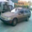

In [25]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/36814.png')
cv2_imshow(img)

In [26]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [27]:
id_list = list(labels_df['id'])

In [28]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [29]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [30]:
type(data)

list

In [31]:
len(data)

50000

In [32]:
type(data[0])

numpy.ndarray

In [33]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
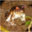

In [34]:
data[0]

In [35]:
# convert images list and label list to numpy arrays

X = np.asarray(data)
Y = np.asarray(labels)

In [36]:
type(X)

numpy.ndarray

In [37]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [40]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [41]:
print(X_train_scaled)

[[[[0.81960784 0.82352941 0.79607843]
   [0.83529412 0.83921569 0.81960784]
   [0.85490196 0.85882353 0.84313725]
   ...
   [0.49803922 0.29019608 0.15294118]
   [0.47843137 0.26666667 0.1372549 ]
   [0.45490196 0.24705882 0.1254902 ]]

  [[0.82352941 0.82352941 0.79215686]
   [0.83529412 0.83921569 0.81176471]
   [0.85490196 0.8627451  0.83921569]
   ...
   [0.48627451 0.2745098  0.1372549 ]
   [0.4745098  0.2627451  0.12941176]
   [0.48235294 0.27058824 0.14117647]]

  [[0.80784314 0.80392157 0.76470588]
   [0.81960784 0.81960784 0.79215686]
   [0.83529412 0.84313725 0.81960784]
   ...
   [0.48627451 0.2745098  0.14509804]
   [0.51372549 0.30196078 0.16470588]
   [0.51372549 0.30588235 0.16078431]]

  ...

  [[0.49803922 0.42352941 0.38039216]
   [0.54117647 0.47843137 0.43137255]
   [0.55294118 0.49803922 0.4627451 ]
   ...
   [0.61960784 0.58431373 0.5254902 ]
   [0.63137255 0.61176471 0.59215686]
   [0.53333333 0.5372549  0.58039216]]

  [[0.56862745 0.50980392 0.46666667]
   [0.5

**Building the Neural Network**

In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
num_of_classes = 10

# setting up the layers of Neural Network
model = keras.Sequential([

    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(num_of_classes, activation = 'softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
# compile the neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [45]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.1383 - loss: 2.2657 - val_acc: 0.2058 - val_loss: 2.0540
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.2393 - loss: 2.0122 - val_acc: 0.2445 - val_loss: 1.9936
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.2420 - loss: 1.9918 - val_acc: 0.2475 - val_loss: 1.9731
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.2437 - loss: 1.9868 - val_acc: 0.2418 - val_loss: 1.9836
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.2461 - loss: 1.9764 - val_acc: 0.2352 - val_loss: 1.9628
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.2500 - loss: 1.9601 - val_acc: 0.2710 - val_loss: 1.9037
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.2778 - loss: 1.9247 - val_acc: 0.2800 - val_loss: 1.8882
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.2866 - loss: 1.9001 - val_acc: 0.2792 - val_loss: 1.9208
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

**ResNet50**

In [46]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [47]:
convolutional_base = ResNet50(weights = 'imagenet', include_top=False, input_shape=(256, 256, 3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [48]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [49]:
model.compile(optimizer=optimizers.RMSprop(learning_rate = 2e-5), loss = 'sparse_categorical_crossentropy', metrics=['acc'])

In [50]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 432s 338ms/step - acc: 0.3216 - loss: 2.0586 - val_acc: 0.7525 - val_loss: 0.8359
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 379s 337ms/step - acc: 0.6615 - loss: 1.0898 - val_acc: 0.8885 - val_loss: 0.4602
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 379s 337ms/step - acc: 0.7859 - loss: 0.7844 - val_acc: 0.9078 - val_loss: 0.3753
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 378s 336ms/step - acc: 0.8507 - loss: 0.6032 - val_acc: 0.9245 - val_loss: 0.3083
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 379s 337ms/step - acc: 0.8980 - loss: 0.4637 - val_acc: 0.9268 - val_loss: 0.2677
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 379s 337ms/step - acc: 0.9251 - loss: 0.3712 - val_acc: 0.9277 - val_loss: 0.2542
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 379s 337ms/step - acc: 0.9492 - loss: 0.2906 - val_acc: 0.9317 - val_loss: 0.2479
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 378s 336ms/step - acc: 0.9587 - loss: 0.2405 - val_acc: 0.9395 - val_loss: 0.2205
Epoch 9/

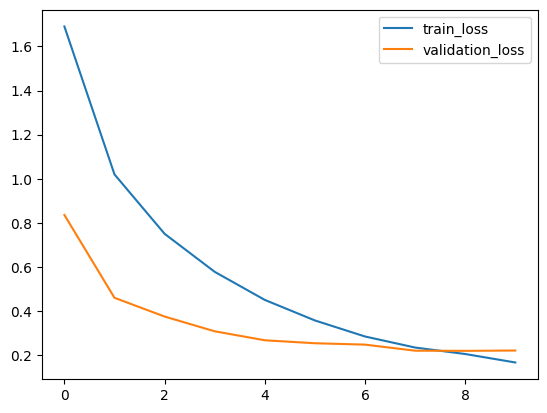

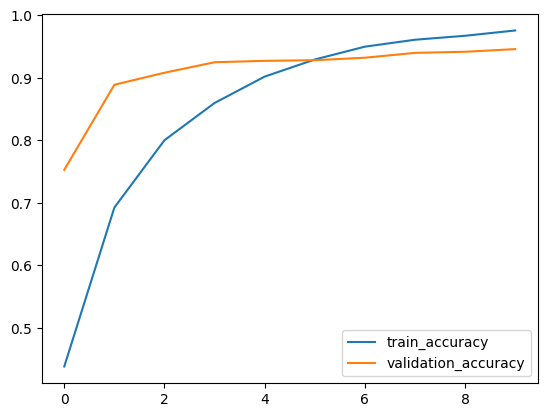

In [51]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label = 'train_accuracy')
plt.plot(h.history['val_acc'], label = 'validation_accuracy')
plt.legend()
plt.show()

In [58]:
def predict_image_class(image_path):
  # Load and preprocess the image
  img = cv2.imread(image_path) # Load image using cv2
  cv2_imshow(img) # Display the image
  img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Convert cv2 image to PIL Image for resizing and scaling
  img = img.resize((32, 32)) # Resize to the expected input shape
  img_array = np.asarray(img)
  img_array = img_array / 255.0  # Scale the image data
  img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

  # Make a prediction
  predictions = model.predict(img_array)
  predicted_class_index = np.argmax(predictions)

  # Get the class label from the dictionary
  # Assuming labels_dictionary is accessible
  predicted_label = list(labels_dictionary.keys())[list(labels_dictionary.values()).index(predicted_class_index)]

  return predicted_label

# Example usage (replace with a valid image path from your dataset)
# print(predict_image_class('/content/train/1.png'))

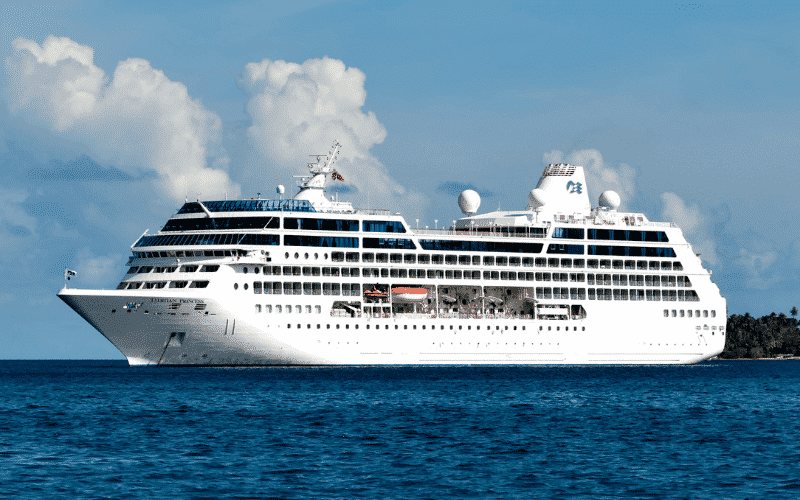

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
ship


In [59]:
print(predict_image_class('/content/ship.png'))